### Motivation

To illustrate how ICM cells are automatically classified in this study using the relative levels of GATA6 and NANOG as variables. 
I first use Hierarchical Clustering to classify ICM cells of reference embryos from [Saiz _et al_ (2016)](https://doi.org/10.1038/ncomms13463) and compare the result to the original one, using K-means Clustering. 
Next I show how I applied Hierarchical Clustering to classify ICM cells in embryos of another dataset which we use for reference in this study, which we published in [Morgani _et al_ (2018)](https://doi.org/10.1016/j.ydbio.2018.06.017)

Load necessary packages, source the plotting aesthetics object and set the working directory to the main project folder, not the notebooks

In [1]:
library('ggplot2')
library('reshape2')
library('plyr')
library('dplyr')

source('../src/plotting-aes.R')

setwd('../')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Read in the Nature Communications dataset from the interim folder.  
Select embryos of 32 or more cells (blastocysts) and order the developmental stage variable

In [3]:
if(exists('ncoms.lms') == F) {
    ncoms.lms <- read.csv('./data/interim/ncoms-lms-tidy.csv')
}

ncoms.lms$Stage <- factor(ncoms.lms$Stage, levels = c('32_64', '64_90', '90_120', '120_150', '>150'))

Re-scale NANOG and GATA6 levels to 0-1 for each litter, for classification purposes, as has been done for the present study

In [4]:
ncoms.lms <- split(ncoms.lms, as.factor(ncoms.lms$Experiment))
for(l in 1:length(ncoms.lms)) { 
  ncoms.lms[[l]]$CH4.ebLogCor.l <- ncoms.lms[[l]]$CH4.ebLogCor / 
    max(ncoms.lms[[l]]$CH4.ebLogCor)
  ncoms.lms[[l]]$CH5.ebLogCor.l <- ncoms.lms[[l]]$CH5.ebLogCor / 
    max(ncoms.lms[[l]]$CH5.ebLogCor)
}
ncoms.lms <- do.call(rbind, ncoms.lms)

Split data into two objects, ```te``` (containing TE cells) and ```icm``` (containing ICM cells)

In [5]:
te <- subset(ncoms.lms, TE_ICM == 'TE')
icm <- subset(ncoms.lms, TE_ICM == 'ICM')

Assign TE to a dummy cluster 0 and impose a 'TE' identity on them, as they have already been classified. Use the ```hclust()``` function to do Hierarchical Clustering on ICM cells using Channel 4 (GATA6 in this dataset) and Channel 5 (NANOG in this dataset) as variables and UPGMA as method (method = 'average')

In [6]:
te$id.cluster <- 0
te$Identity.hc <- 'TE'

my.clusters <- hclust(dist(data.frame(icm$CH4.ebLogCor.l, 
                                      icm$CH5.ebLogCor.l)), 
                      method = 'average')

Display the resulting dendrogram

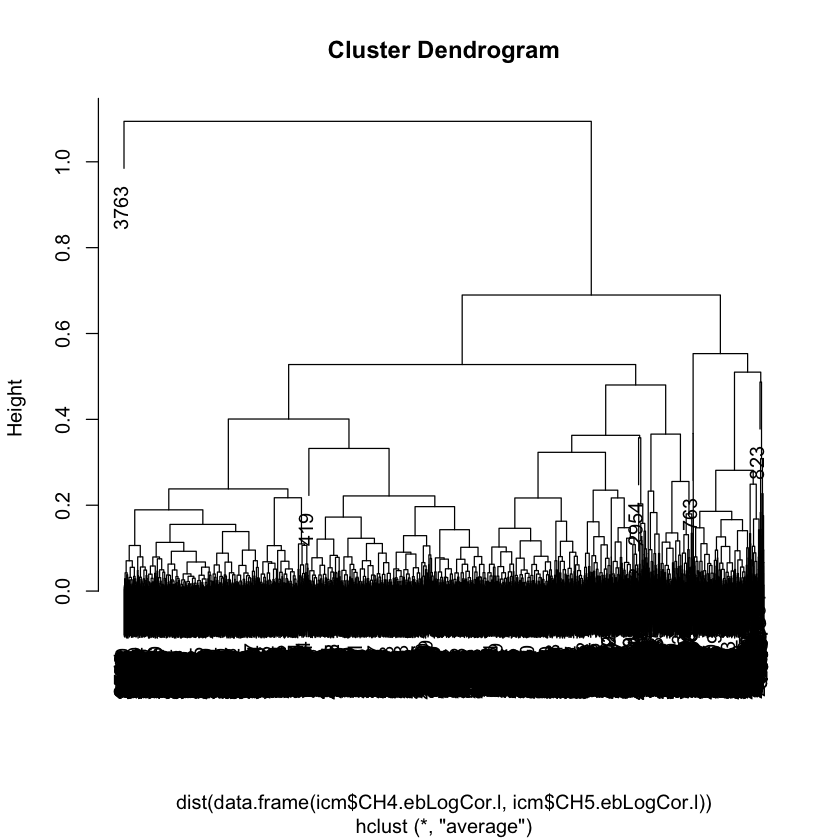

In [14]:
plot(my.clusters)

Cut the dendrogram at sequential levels, from 4 clusters (the minimal number of clusters we expect (EPI, PrE, DP and NANOG.lo EPI cells), up to 15 clusters, to see how much does it make sense to break up the population.  
For each instance, generate a table comparing the correspondence between the clusters generated and the original identities assigned using K-means Clustering (DN, DP, EPI, PRE, TE across the top).

   
      DN   DP  EPI  PRE   TE
  1  300 1433  860 1099    0
  2   23    0    0  435    0
  3    4    0    0    0    0
  4    1    0    0    0    0


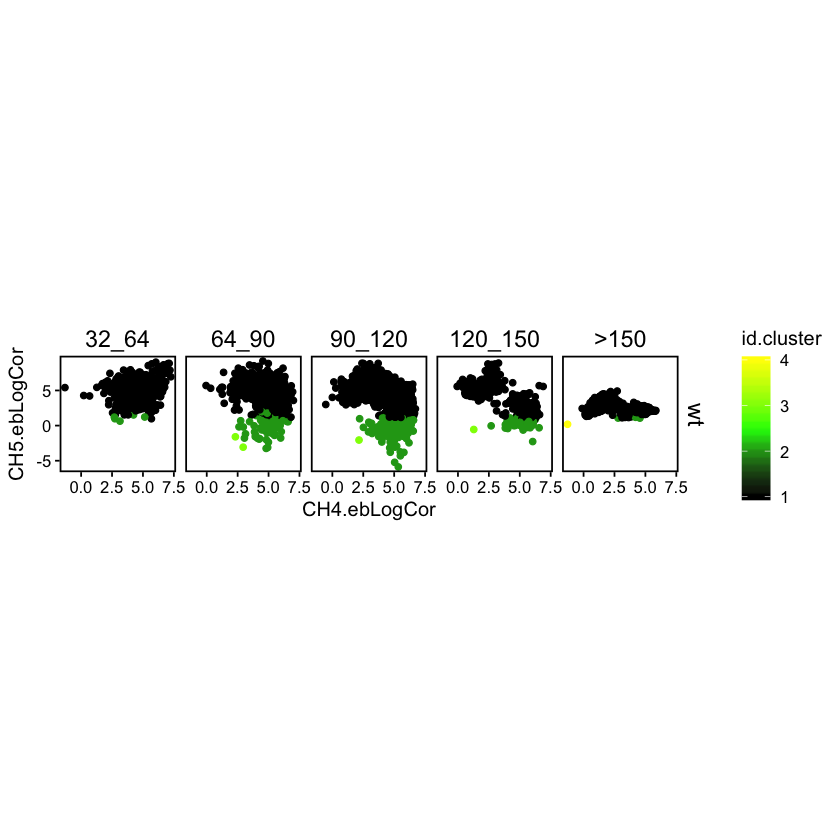

   
      DN   DP  EPI  PRE   TE
  1   10 1258   28 1061    0
  2  290  175  832   38    0
  3   23    0    0  435    0
  4    4    0    0    0    0
  5    1    0    0    0    0


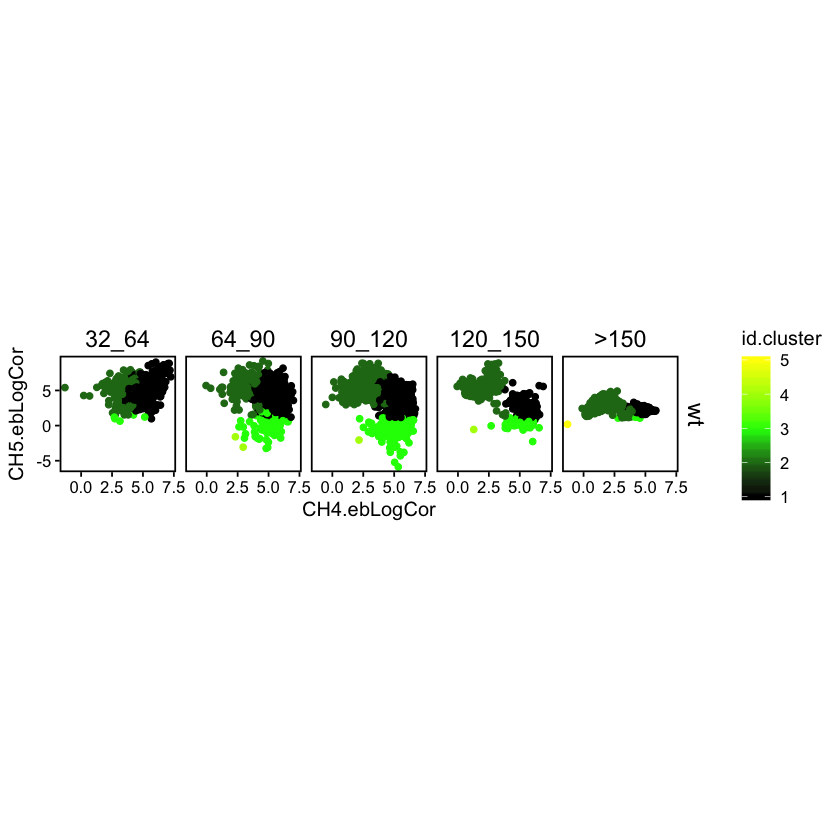

   
      DN   DP  EPI  PRE   TE
  1   10 1258   28 1061    0
  2  290  175  832   38    0
  3   23    0    0  408    0
  4    4    0    0    0    0
  5    0    0    0   27    0
  6    1    0    0    0    0


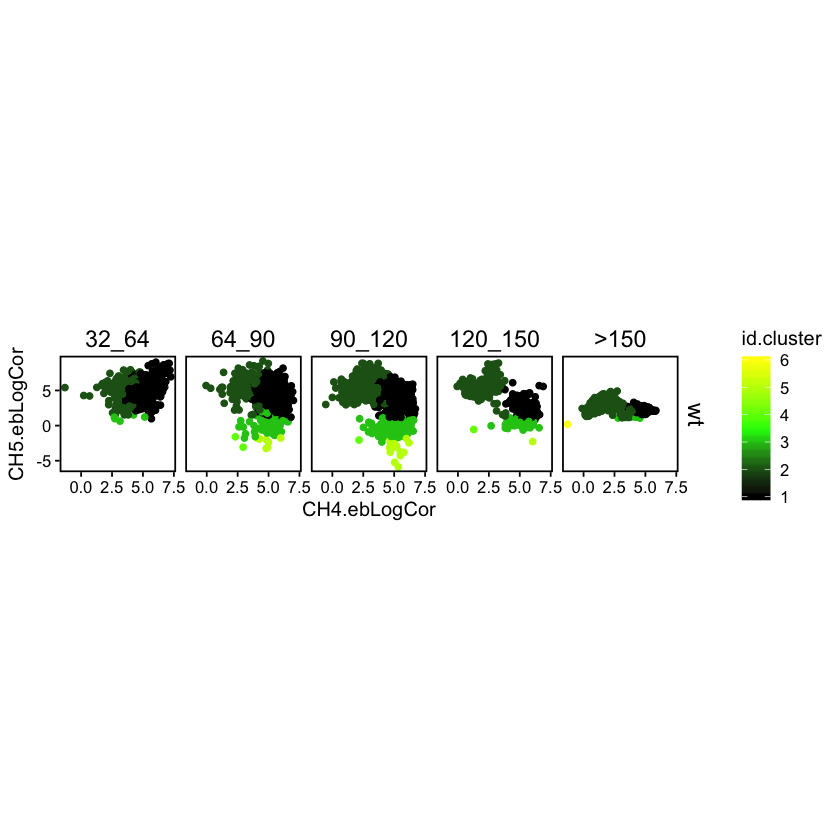

   
      DN   DP  EPI  PRE   TE
  1   10 1258   28 1061    0
  2  290  175  832   38    0
  3   23    0    0  408    0
  4    4    0    0    0    0
  5    0    0    0   26    0
  6    0    0    0    1    0
  7    1    0    0    0    0


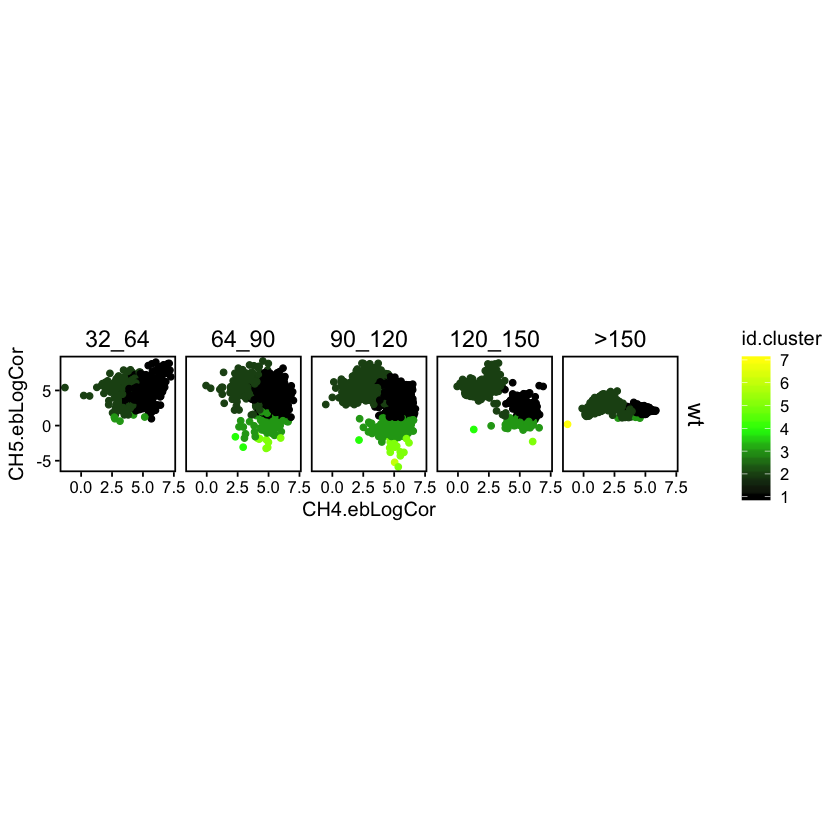

   
      DN   DP  EPI  PRE   TE
  1   10 1258   28 1061    0
  2   53  175  816    0    0
  3   23    0    0  408    0
  4  237    0   16   38    0
  5    4    0    0    0    0
  6    0    0    0   26    0
  7    0    0    0    1    0
  8    1    0    0    0    0


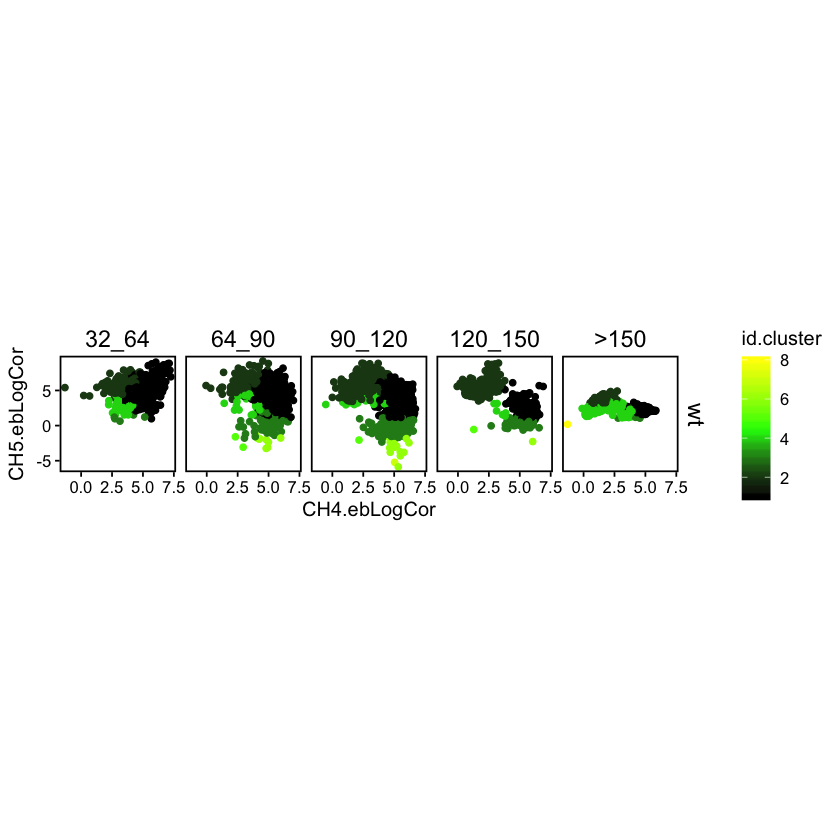

   
      DN   DP  EPI  PRE   TE
  1    9  161    3 1026    0
  2    1 1097   25   35    0
  3   53  175  816    0    0
  4   23    0    0  408    0
  5  237    0   16   38    0
  6    4    0    0    0    0
  7    0    0    0   26    0
  8    0    0    0    1    0
  9    1    0    0    0    0


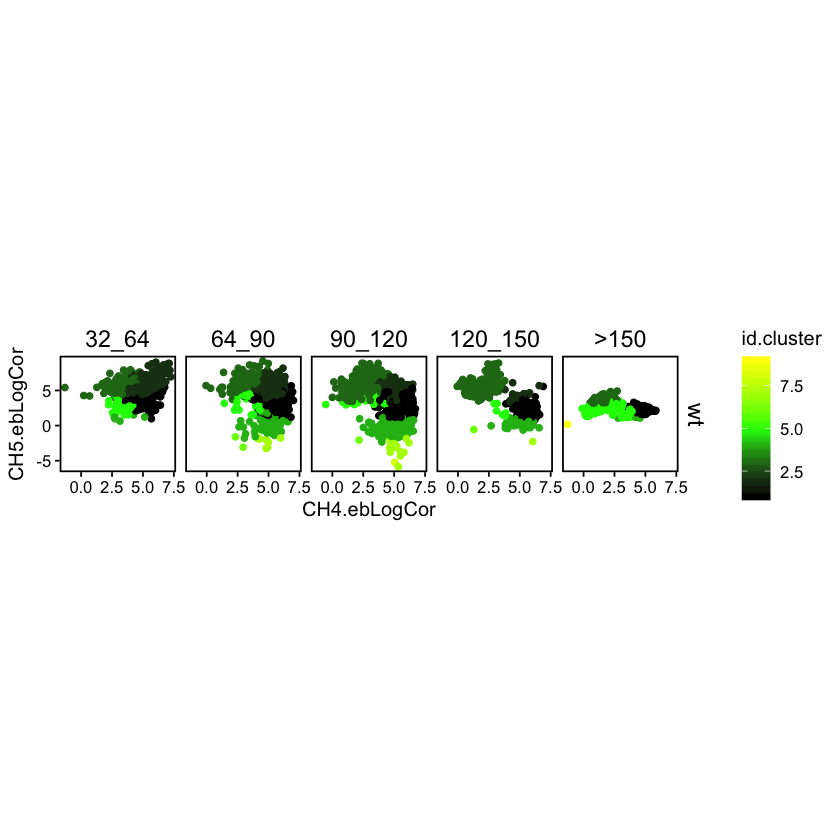

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1097   25   35    0
  3    53  175  816    0    0
  4    23    0    0  408    0
  5   237    0   16   38    0
  6     1    0    0    0    0
  7     0    0    0   26    0
  8     0    0    0    1    0
  9     3    0    0    0    0
  10    1    0    0    0    0


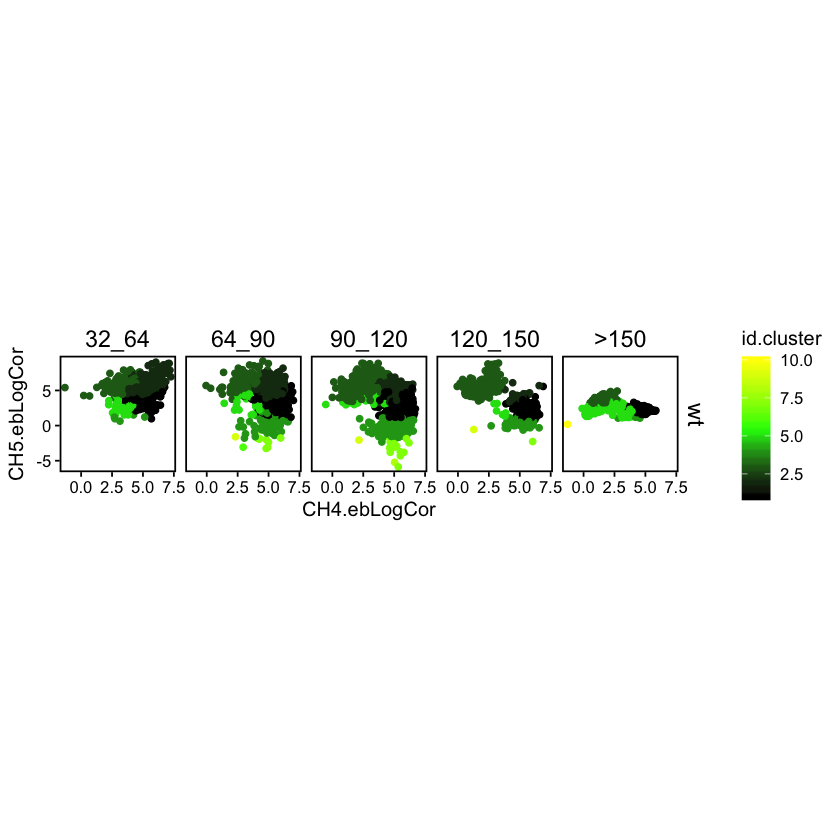

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1097   25   35    0
  3    53  175  816    0    0
  4    23    0    0  408    0
  5    82    0    0    0    0
  6   155    0   16   38    0
  7     1    0    0    0    0
  8     0    0    0   26    0
  9     0    0    0    1    0
  10    3    0    0    0    0
  11    1    0    0    0    0


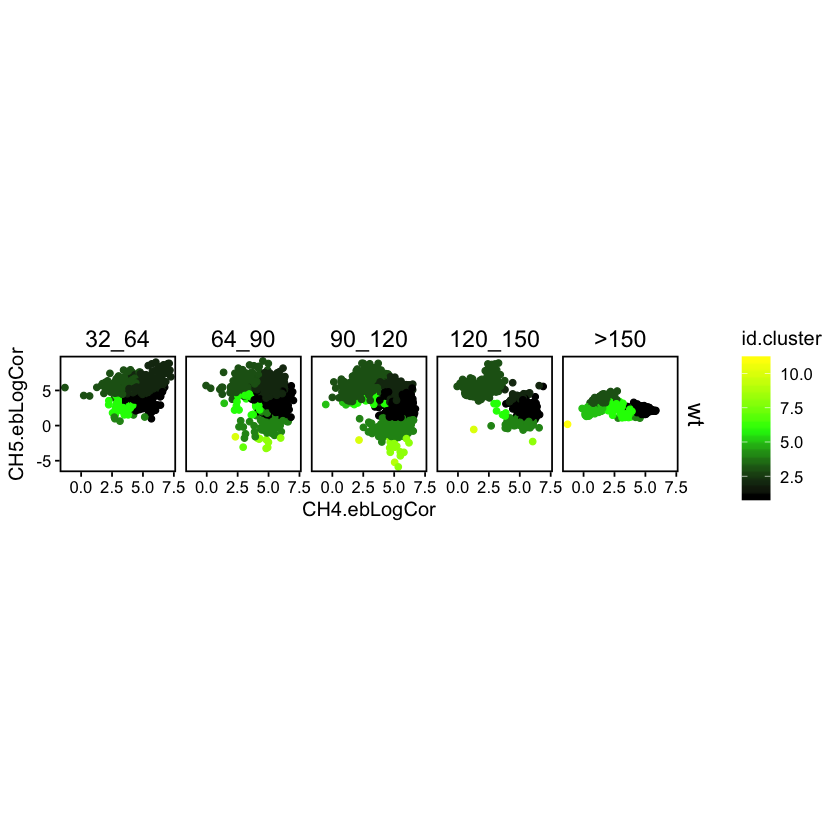

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1097   25   35    0
  3    53  175  754    0    0
  4    23    0    0  408    0
  5    82    0    0    0    0
  6   155    0   16   38    0
  7     1    0    0    0    0
  8     0    0    0   26    0
  9     0    0   62    0    0
  10    0    0    0    1    0
  11    3    0    0    0    0
  12    1    0    0    0    0


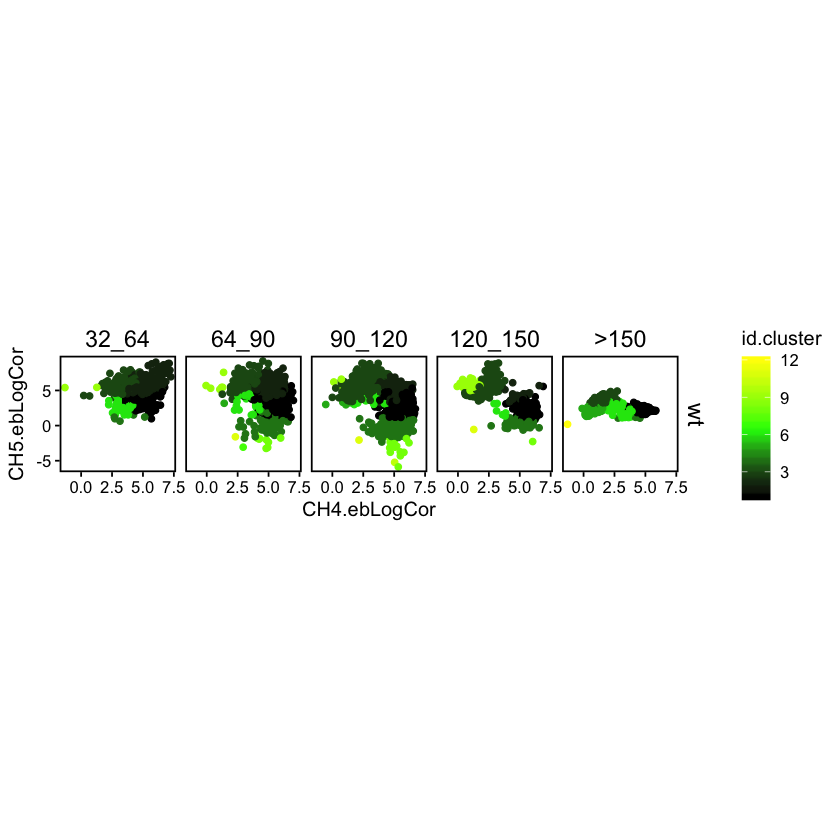

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1097   25   35    0
  3    53  175  754    0    0
  4    23    0    0  408    0
  5    82    0    0    0    0
  6   155    0   16   38    0
  7     1    0    0    0    0
  8     0    0    0   26    0
  9     0    0   61    0    0
  10    0    0    0    1    0
  11    3    0    0    0    0
  12    0    0    1    0    0
  13    1    0    0    0    0


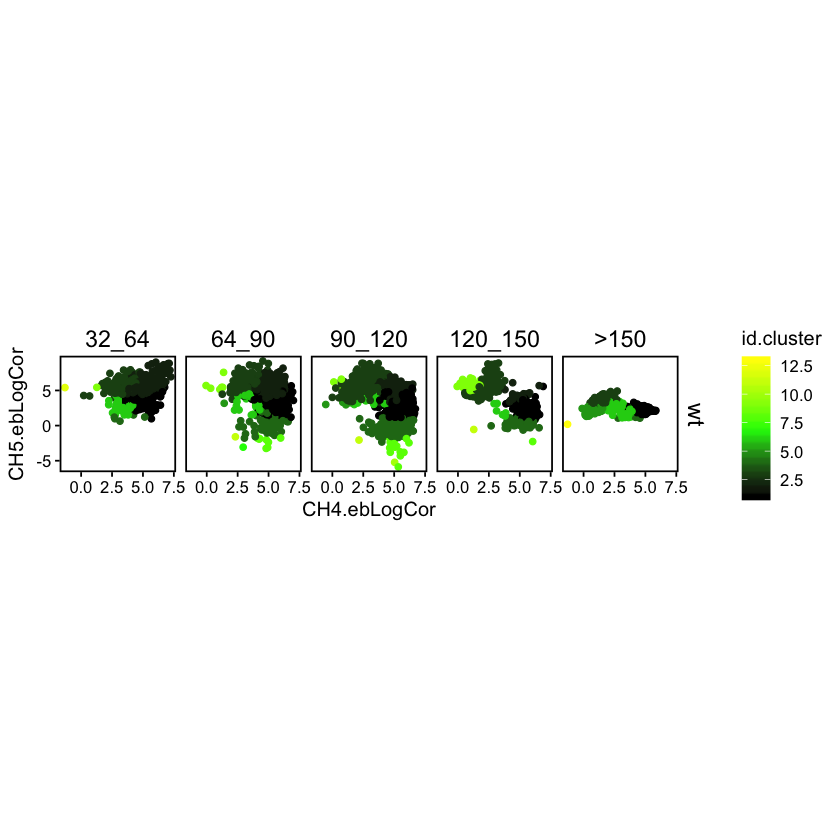

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1096   25   35    0
  3    53  175  754    0    0
  4    23    0    0  408    0
  5    82    0    0    0    0
  6     0    1    0    0    0
  7   155    0   16   38    0
  8     1    0    0    0    0
  9     0    0    0   26    0
  10    0    0   61    0    0
  11    0    0    0    1    0
  12    3    0    0    0    0
  13    0    0    1    0    0
  14    1    0    0    0    0


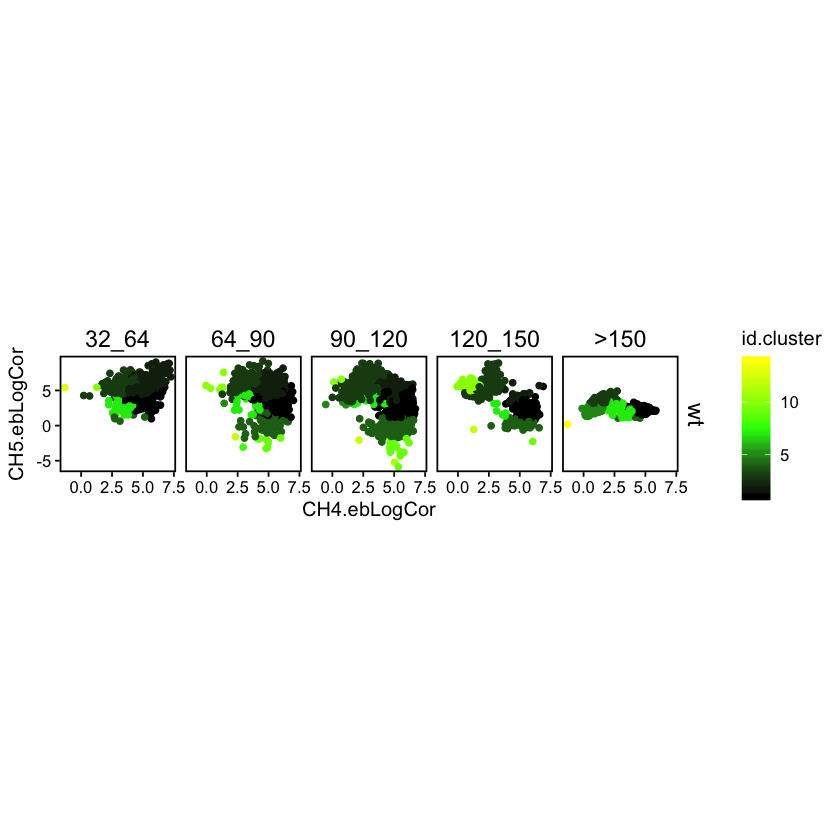

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1096   25   35    0
  3     0  166  462    0    0
  4    23    0    0  408    0
  5    53    9  292    0    0
  6    82    0    0    0    0
  7     0    1    0    0    0
  8   155    0   16   38    0
  9     1    0    0    0    0
  10    0    0    0   26    0
  11    0    0   61    0    0
  12    0    0    0    1    0
  13    3    0    0    0    0
  14    0    0    1    0    0
  15    1    0    0    0    0


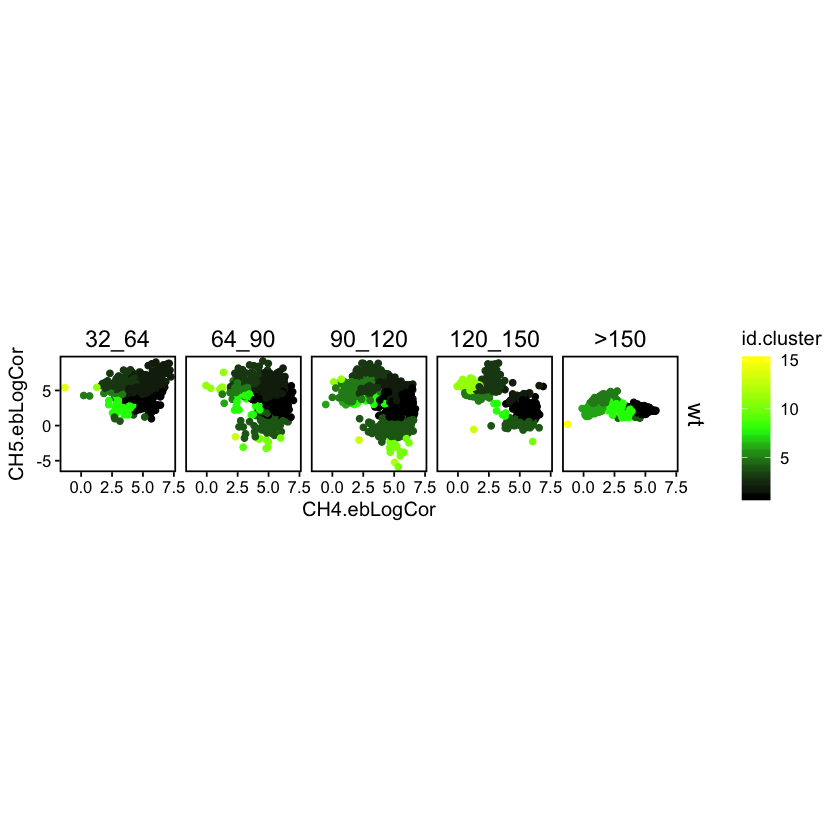

In [7]:
ks <- 4:15
for(k in ks) { 
    # Cut the dataset into k clusters
    icm$id.cluster <- cutree(my.clusters, k)
    # Print a table showing the distribution of the original identities (calculated using K-means) 
    # to the new clusters
    my.table <- table(icm$id.cluster, icm$Identity.km)
    # Print a scatterplot of the ICM data color coded for each cluster made
    my.plot <- ggplot(data = icm, 
                      aes(x = CH4.ebLogCor,  
                          y = CH5.ebLogCor)) +
                 geom_jitter(aes(color = id.cluster)) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
    print(my.plot)
    print(my.table)
}


This dataset has a fairly complicated structure, stemming from the noise in the data acquisition and processing. This aspect has been improved in newer datasets (compare to data from [Morgani et al (2018)](https://doi.org/10.1016/j.ydbio.2018.06.017) and current study). 

Nevertheless, it takes 15 clusters to resolve some of the smaller populations in the Nature Communications data. Even with that, cluster 8 captures a lot of what would be low-NANOG epiblast (NANOG.lo, cluster 6 as well) and a fair amount of PrE cells.

    
       DN   DP  EPI  PRE   TE
  1     9  161    3 1026    0
  2     1 1096   25   35    0
  3     0  166  462    0    0
  4    23    0    0  408    0
  5    53    9  292    0    0
  6    82    0    0    0    0
  7     0    1    0    0    0
  8   155    0   16   38    0
  9     1    0    0    0    0
  10    0    0    0   26    0
  11    0    0   61    0    0
  12    0    0    0    1    0
  13    3    0    0    0    0
  14    0    0    1    0    0
  15    1    0    0    0    0

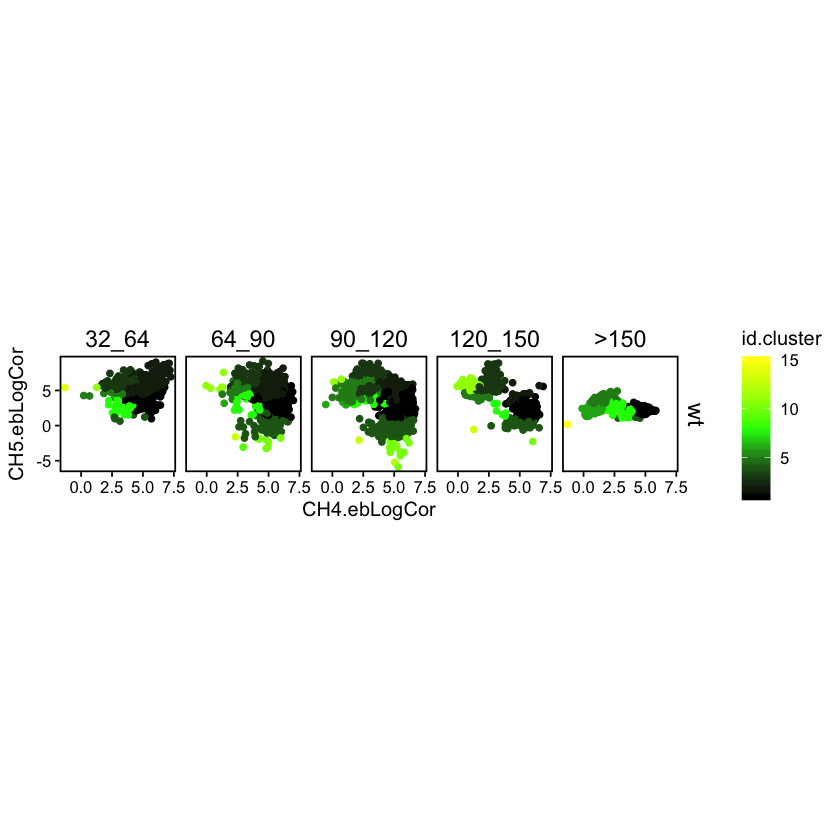

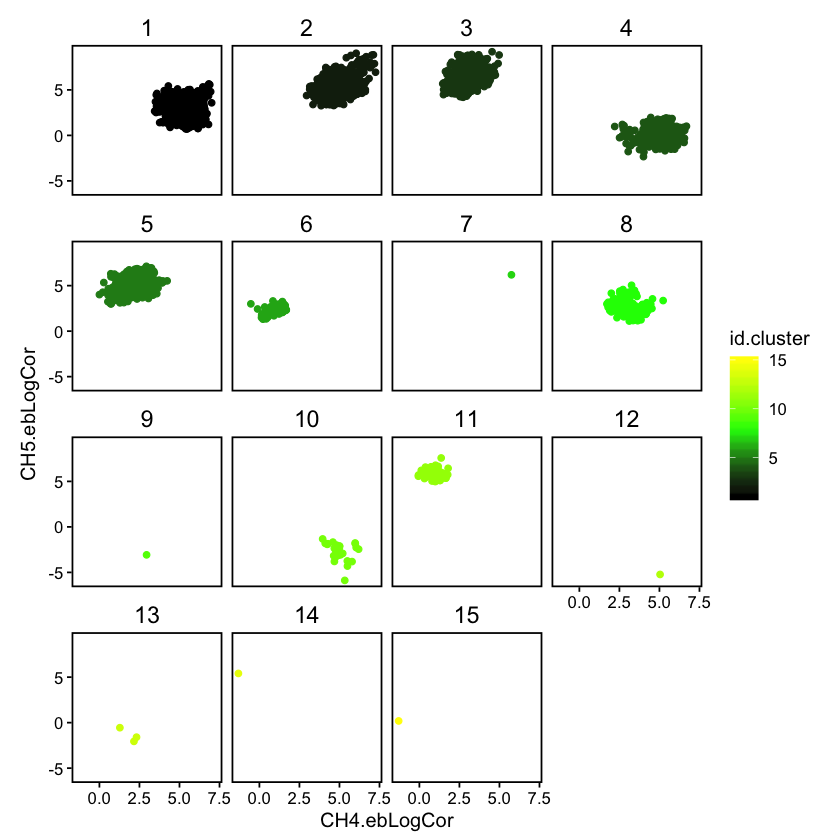

In [8]:
k = 15
icm$id.cluster <- cutree(my.clusters, k)
table(icm$id.cluster, icm$Identity.km)

my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = id.cluster) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
print(my.plot)

my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = id.cluster) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_wrap( ~ id.cluster) + theme(aspect.ratio = 1)
print(my.plot)



Manually assign identities to each cluster and incorporate into ```icm```

In [9]:
# Assing identity to each cluster and combine with icm
idxclust <- data.frame(id.cluster = 1:k, 
                       Identity.hc = c('PRE', 'DP', 'EPI', 
                                       'PRE', 'EPI', 'EPI.lo', 
                                       'DP', 'DN', 'DN', 'PRE', 
                                       'EPI', 'PRE', 'DN', 
                                       'EPI', 'DN'))
icm <- merge(icm, idxclust)

Plot ICM cells now color-coded for the identity assigned using Hierarchical clustering

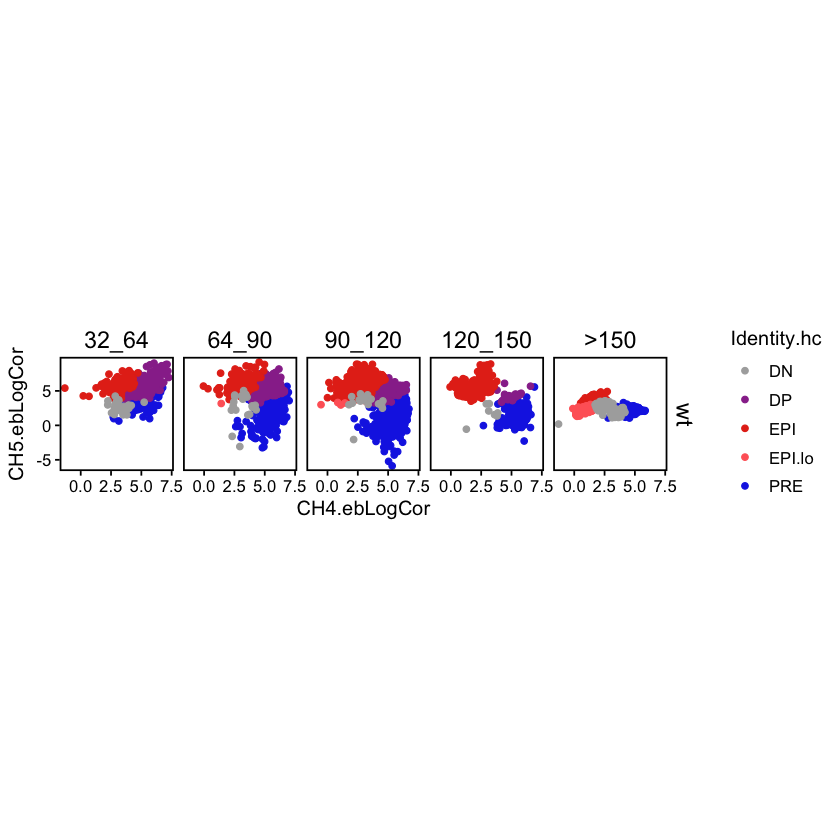

In [10]:
my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = Identity.hc) +
        looks + scale_color_manual(values = idcols) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
print(my.plot)

Below is the same plot using the original classification, which used K-means Clustering

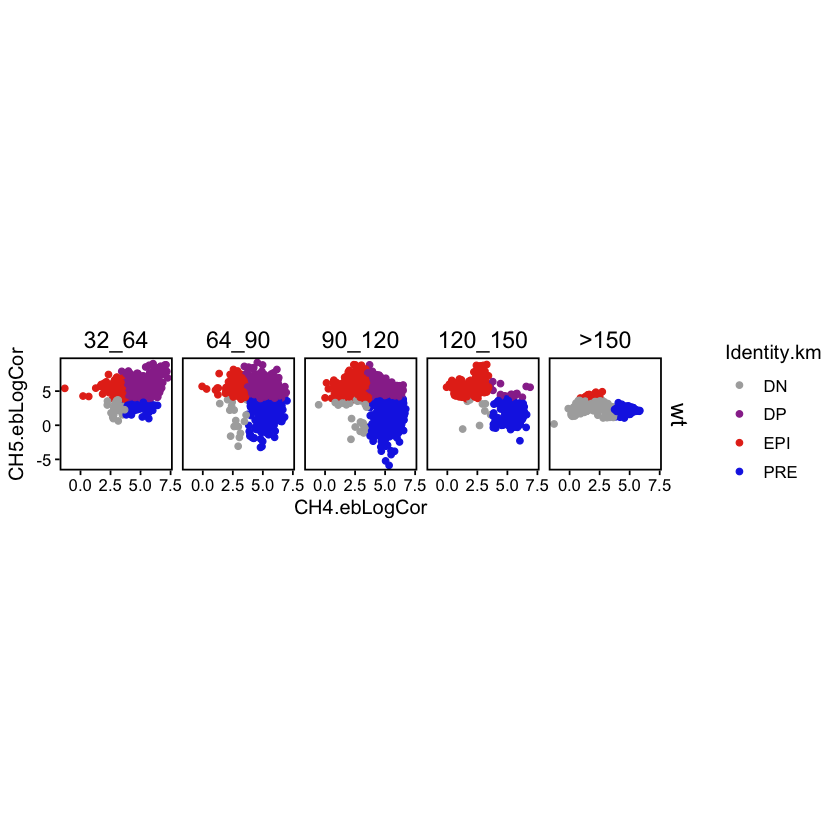

In [11]:
my.plot <- qplot(CH4.ebLogCor,  CH5.ebLogCor,
                 data = icm, color = Identity.km) +
        looks + scale_color_manual(values = idcols) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1)
print(my.plot)

Unfortunately, neither solution seems necessarily _better_ than the other, which reflects the high degree of noise inherent to this particular dataset and the fact that the clusters do not completely separate.  

However, it stands out that K-means tends to divide the data into roughly four quadrants, which may or may not be what we are after. This is due to the tendency of K-means Clustering to try and find equally-sized clusters. In our case, the size of the clusters changes as embryos develop, so K-means tends to under-estimate the size of the DP compartment at early stages, and over-estimate it at late stages (and vice versa for the DN/NANOG.lo compartments). Therefore, in the present study, we have used Hierarchical Clustering instead of K-means, as we found it produces more realistic results.  

Below is another example of how we have applied this method to a dataset which we published in 2018 ([Morgani _et al_ (2018) _Dev Biol_](https://doi.org/10.1016/j.ydbio.2018.06.017))

Read in the data from the interim folder and order the developmental stage variable and the genotype variable.  

In [30]:
if(exists('spry.lms') == F) {
    spry.lms <- read.csv('./data/interim/spry4-lms-tidy.csv')
}

spry.lms$Stage <- factor(spry.lms$Stage, levels = c('8_16', '16_32', '32_64', '64_90', '90_120', '120_150', '>150'))
spry.lms$Genotype1 <- factor(spry.lms$Genotype1, levels = c('wt', 'het', 'ko'))

Re-scale fluorescence values to 0-1 for classification purpuses, as done previously and throughout the study.

In [31]:
spry.lms <- split(spry.lms, as.factor(spry.lms$Experiment))
for(l in 1:length(spry.lms)) { 
  spry.lms[[l]]$CH3.ebLogCor.l <- spry.lms[[l]]$CH3.ebLogCor / 
    max(spry.lms[[l]]$CH3.ebLogCor)
  spry.lms[[l]]$CH5.ebLogCor.l <- spry.lms[[l]]$CH5.ebLogCor / 
    max(spry.lms[[l]]$CH5.ebLogCor)
}
spry.lms <- do.call(rbind, spry.lms)

Assign TE to a dummy cluster 0 and impose a 'TE' identity on them, as they have already been classified. Assign cells in morula-stage embryos to a dummy cluster 6, with 'morula' identity (we will not classify these cells, but they coexpress NANOG and GATA6)

In [32]:
## Impose identity on TE cells
te <- subset(spry.lms, TE_ICM == 'TE')
te$id.cluster <- 0
te$Identity.hc <- 'TE'

# and on cells classified as 'in' or 'out', which are too early (morulas)
rest <- subset(spry.lms, Identity.km == 'morula')
rest$id.cluster <- 6
rest$Identity.hc <- 'morula'

Use ```hclust()``` to run Hierarchical Clustering on ICM cells of blastocyst stage embryos, as earlier.

In [45]:
# Classify ICM cells in blastocysts using Hierarchical clustering
icm <- subset(spry.lms, TE_ICM == 'ICM' & Identity.km != 'morula')
my.clusters <- hclust(dist(data.frame(icm$CH5.ebLogCor.l, 
                                      icm$CH3.ebLogCor.l)), 
                      method = 'average')

Here is the resulting dendrogram

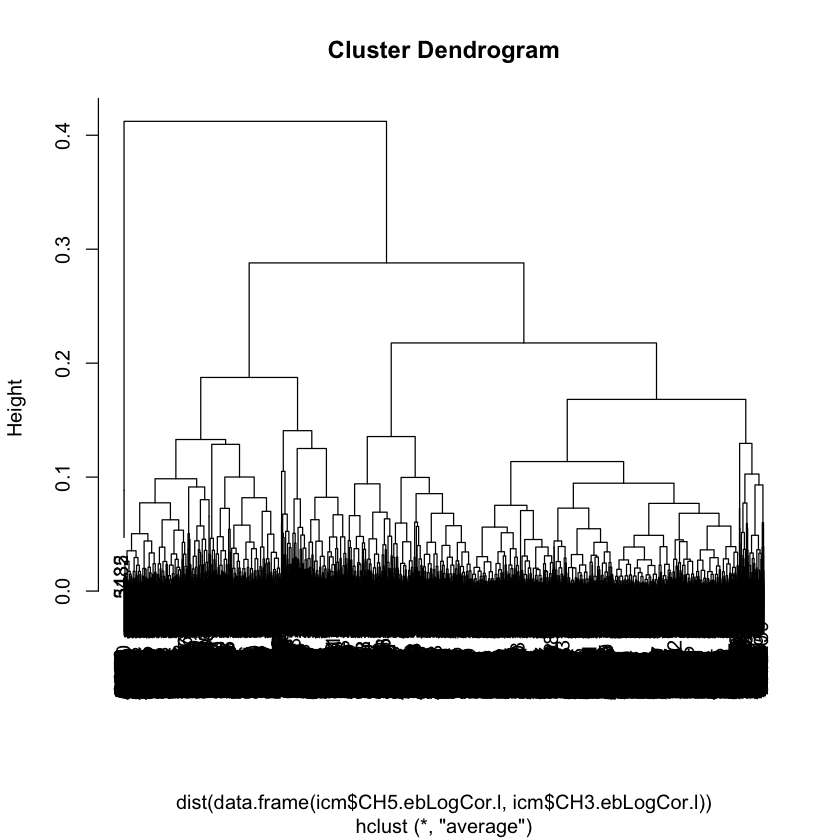

In [34]:
plot(my.clusters)

As we might expect, there seem to be 4 major clusters (which might correspond to the 4 ICM states we look for) plus a rogue cluster made up of one or two cells. Therefore we can cut the tree into those 5 clusters and see how they compare to the identities we obtained using K-means Clustering in Morgani _et al_ (2018). 

In [46]:
k = 5
icm$id.cluster <- cutree(my.clusters, k)
table(icm$id.cluster, icm$Identity.km)

   
      DN   DP  EPI morula  PRE   TE
  1   50 1407   78      0  212    0
  2  320  162    0      0 3636    0
  3  197  349 1667      0    3    0
  4  674    5  238      0   17    0
  5    2    0    0      0    0    0

Cluster 2 contains most of the original PrE cells, as well as some cells that had been originally assigned to the DP or DN populations (table header). Cluster 3 contains most of the original epiblast cells, as well as some DP and DN cells (as per K-means Clustering), whereas cluster 4 conains many of the original DN cells, alongside some of the original epiblast cells. Therefore, there is a litte bit of a reshuffle of cells. Cluster 5 indeed contains only two values. Let's see graphically what these clusters look like.  

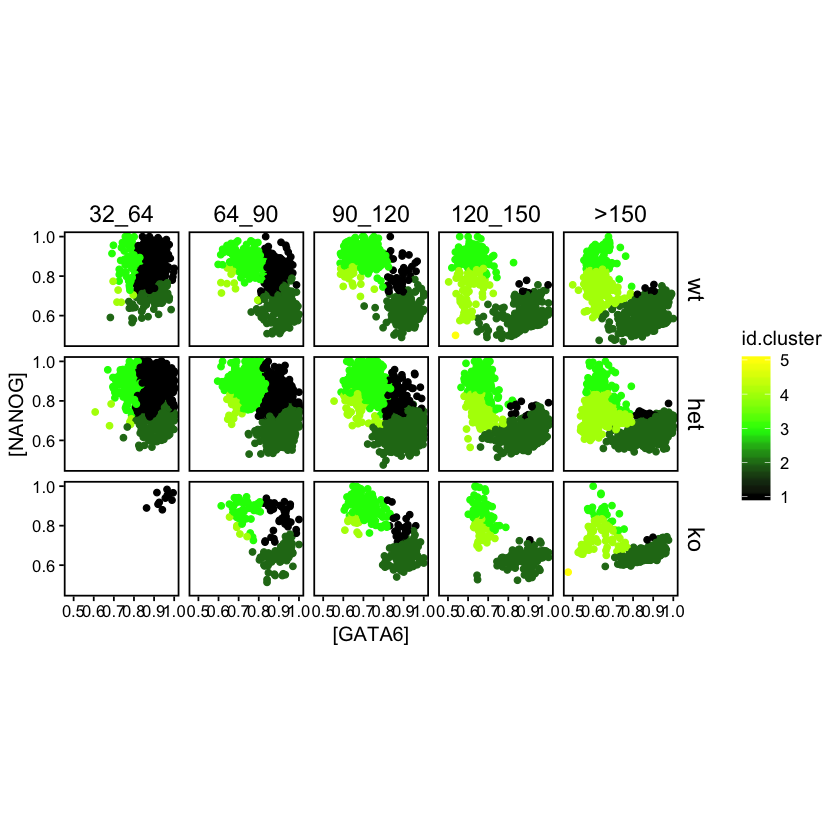

In [43]:
my.plot <- qplot(CH5.ebLogCor.l,  CH3.ebLogCor.l,
                 data = icm, color = id.cluster) +
        looks + scale_color_gradient2(low = 'black', mid = 'green',
                                      high = 'yellow', midpoint = (k+1)/2) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1) + 
        labs(x = '[GATA6]', y = '[NANOG]')
print(my.plot)


The clusters no longer divide the data into quadrants, but take less predictable shapes. This is neither a good or bad indicator. However, the PrE and epiblast/NANOG-lo epiblast cells seem to be captured homogeneously in clusters 2, 3 and 4, respectively, at least at late stages. The boundaries are still areas of uncertainty -- for instance between NANOG-lo epiblast (4) and PrE (2) at late stages, or between DP (1) and either PrE (2) or epiblast (3).  
Whilst these boundaries are somewhat arbitrary in both cases, and ultimately might depend on factors we are not analyzing here, I think this method better fits the distribution of the data and does not impose sharp boundaries, which are unlikely to define the real populations. 

Finally, let's assign identities to each cluster and color code them as we do in the paper.

In [47]:
# Assing identity to each cluster and combine with icm
idxclust <- data.frame(id.cluster = 1:k, 
                       Identity.hc = c('DP', 'PRE', 'EPI', 'EPI.lo', 'DN'))
icm <- merge(icm, idxclust)

# Renerate spry.lms dataset and remove other objects
spry.lms <- rbind(icm, rbind(te, rest))
rm(icm, te, rest, my.clusters, idxclust)

spry.lms$Identity.hc <- factor(spry.lms$Identity.hc, 
                               levels = c('TE', 'PRE', 'DP', 'EPI', 'EPI.lo', 
                                          'DN', 'morula'))

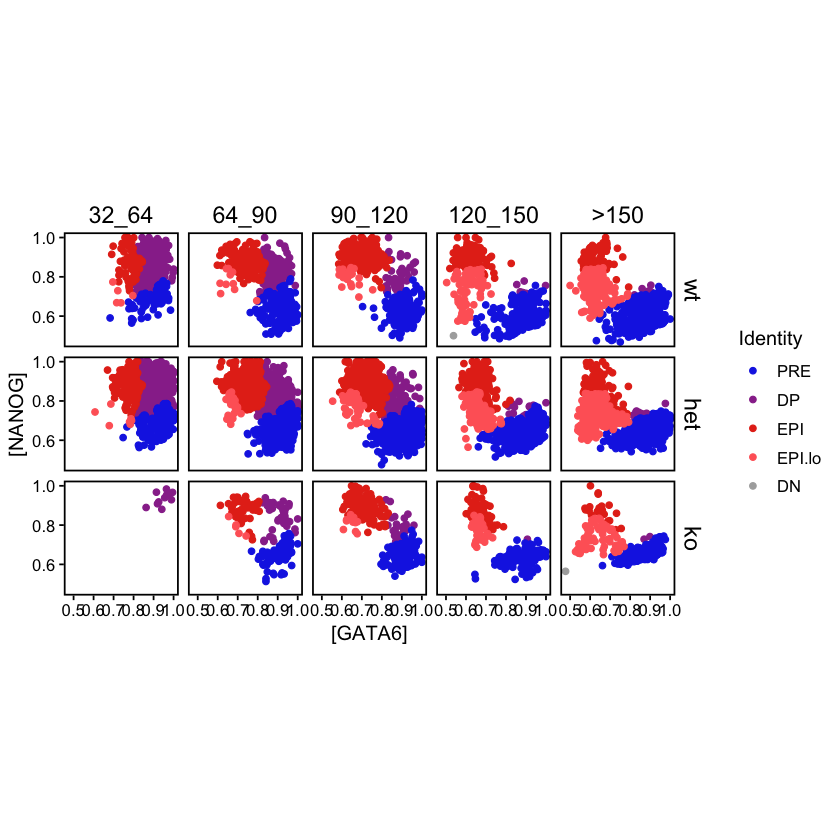

In [49]:
my.plot <- qplot(CH5.ebLogCor.l,  CH3.ebLogCor.l,
                 data = subset(spry.lms, TE_ICM == 'ICM' & Identity.hc != 'morula'), 
                 color = Identity.hc) +
        looks + scale_color_manual(values = idcols) +
        facet_grid(Genotype1 ~ Stage) + theme(aspect.ratio = 1) + 
        labs(x = '[GATA6]', y = '[NANOG]', color = 'Identity')
print(my.plot)